# Instructions
The following Cells need to be executed.

They are used to download and generate a dataset that has an aggregated count of bike trips per hundredth of an hour through the 24 hours in a day. 

The assignment is in the last cell.

## This cell automatically downloads Capital Bikeshare data

### And here we read in the data

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 10
import pandas as pd
import numpy as np
bikes = pd.read_csv('../data/bikeshare.csv.gz')
bikes.head()
bikes['start'] = pd.to_datetime(bikes['Start date'], infer_datetime_format=True)
bikes['end'] = pd.to_datetime(bikes['End date'], infer_datetime_format=True)
bikes["dur"] = (bikes['Duration (ms)']/1000).astype(int)
bikes.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end,dur
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,2016-03-31 23:59:00,2016-04-01 00:04:00,301
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,557
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,555
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,2016-03-31 23:57:00,2016-04-01 00:09:00,766
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,2016-03-31 23:57:00,2016-03-31 23:59:00,139


In [26]:
bikes.dur.mean()

992.8716543657755

In [27]:
bikes.dur.std()

2073.9809135296514

In [28]:
bikes[bikes.dur>16000].shape

(973, 12)

In [29]:
plt.rcParams['figure.figsize'] = 20, 10

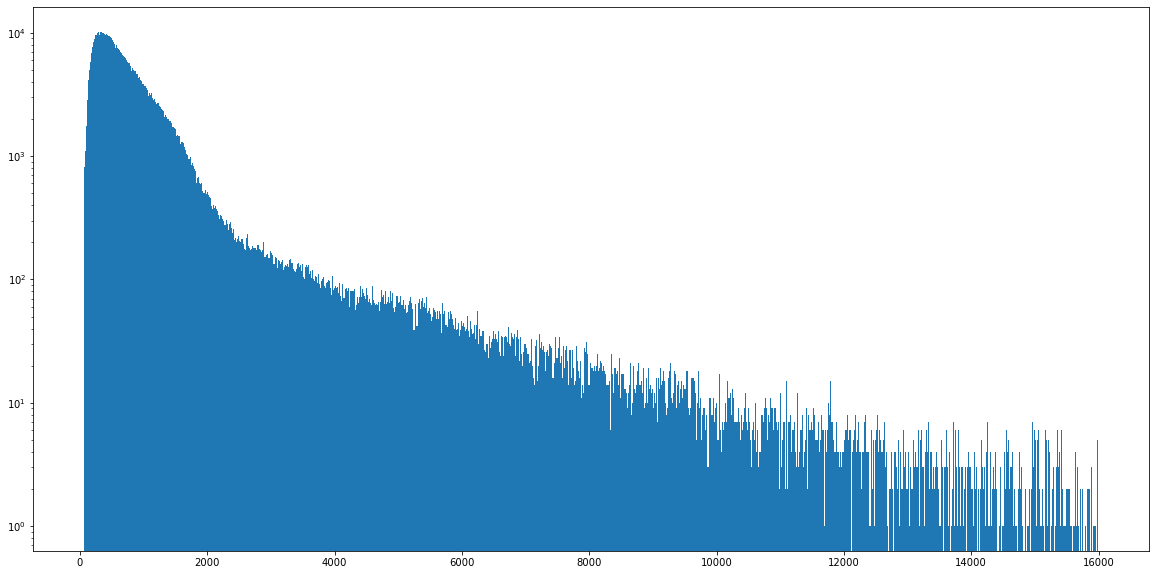

In [30]:
_=plt.hist(bikes[bikes.dur<16000].dur, log=True, bins=1000)

In [31]:
short = bikes[bikes.dur<16000]

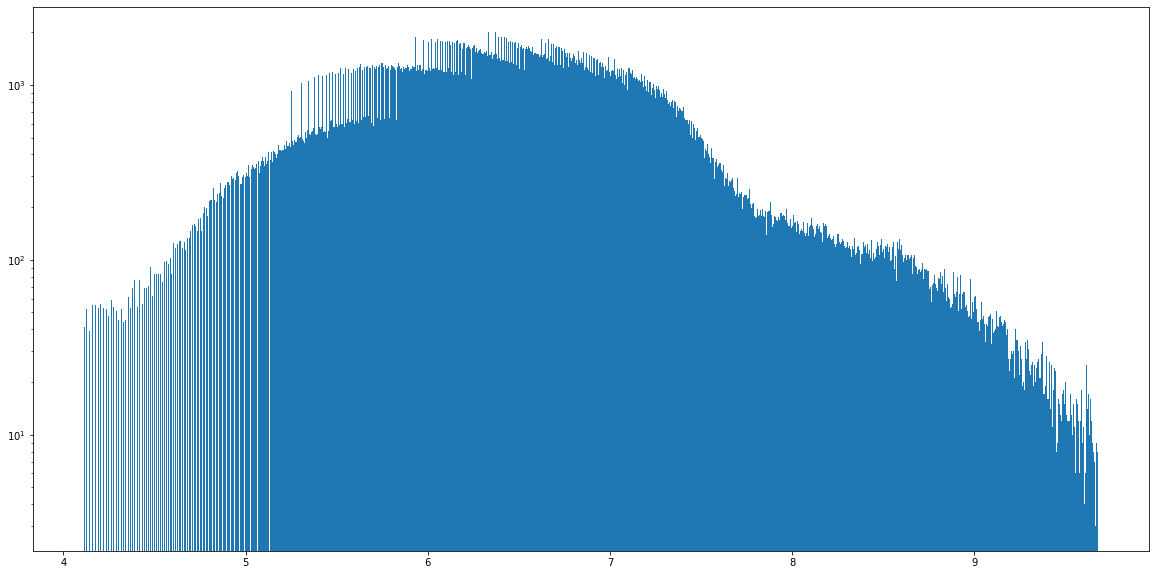

In [32]:
_=plt.hist(np.log1p(short.dur), log=True, bins=1000)

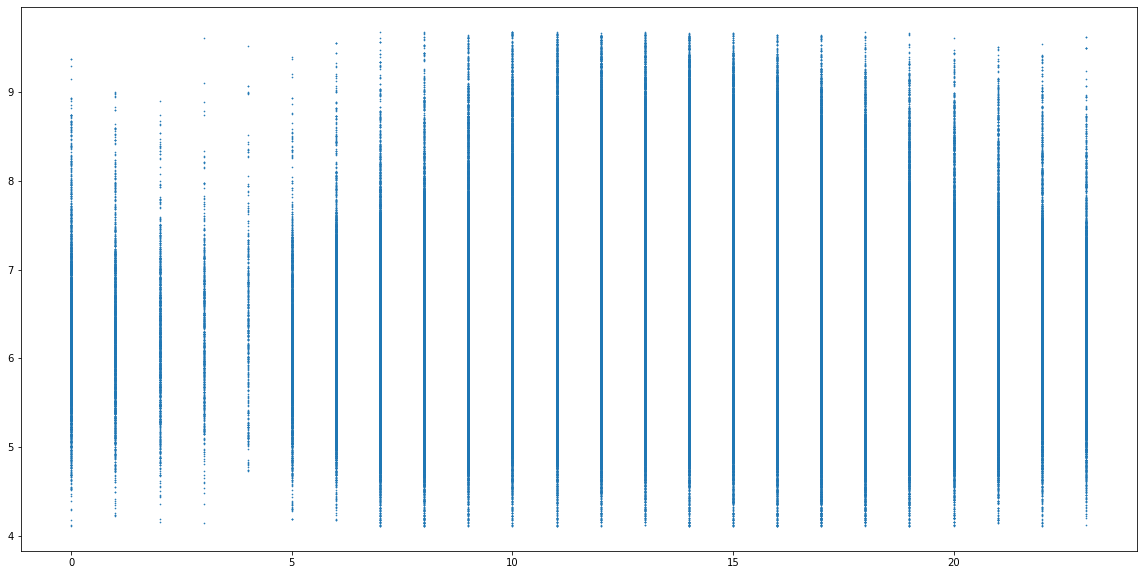

In [33]:
plt.scatter(short.start.dt.hour, np.log1p(short.dur), s=.4)

In [34]:
np.log1p(0), np.log(0)

<ipython-input-34-b51b28618e97>:1: RuntimeWarning: divide by zero encountered in log
  np.log1p(0), np.log(0)


(0.0, -inf)

In [35]:
bikes['log_dur'] = np.round(np.log1p(bikes.dur), 1)

In [36]:
monday = bikes[bikes.start.dt.dayofweek==1]

In [37]:
dur_hour = monday.groupby(['log_dur', monday.start.dt.hour]).count()

In [38]:
dur_hour

Duration (ms)  Start date  End date  Start station number  \
log_dur start                                                              
4.1     7                  1           1         1                     1   
        9                  2           2         2                     2   
        11                 1           1         1                     1   
        14                 2           2         2                     2   
        16                 2           2         2                     2   
...                      ...         ...       ...                   ...   
11.2    21                 2           2         2                     2   
11.3    14                 1           1         1                     1   
        17                 1           1         1                     1   
        19                 1           1         1                     1   
11.4    18                 1           1         1                     1   

               Start station  End station number  End station  Bike number  \
log_dur start                                                                
4.1     7                  1                   1            1            1   
        9                  2                   2            2            2   
        11                 1                   1            1            1   
        14                 2                   2            2            2   
        16                 2                   2            2            2   
...                      ...                 ...          ...          ...   
11.2    21                 2                   2            2            2   
11.3    14                 1                   1            1            1   
        17                 1                   1            1            1   
        19                 1                   1            1            1   
11.4    18                 1                   1            1            1   

               Member Type  start  end  dur  
log_dur start                                
4.1     7                1      1    1    1  
        9                2      2    2    2  
        11               1      1    1    1  
        14               2      2    2    2  
        16               2      2    2    2  
...                    ...    ...  ...  ...  
11.2    21               2      2    2    2  
11.3    14               1      1    1    1  
        17               1      1    1    1  
        19               1      1    1    1  
11.4    18               1      1    1    1  

[1184 rows x 12 columns]

In [39]:
duration_hour = dur_hour.start.unstack().T.fillna(0)
duration_hour

log_dur,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,...,10.5,10.6,10.7,10.8,10.9,11.0,11.1,11.2,11.3,11.4
start,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,7.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,2.0,1.0,2.0,4.0,9.0,11.0,21.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,5.0,4.0,1.0,5.0,12.0,25.0,31.0,46.0,46.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,3.0,2.0,6.0,7.0,11.0,22.0,52.0,68.0,79.0,...,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


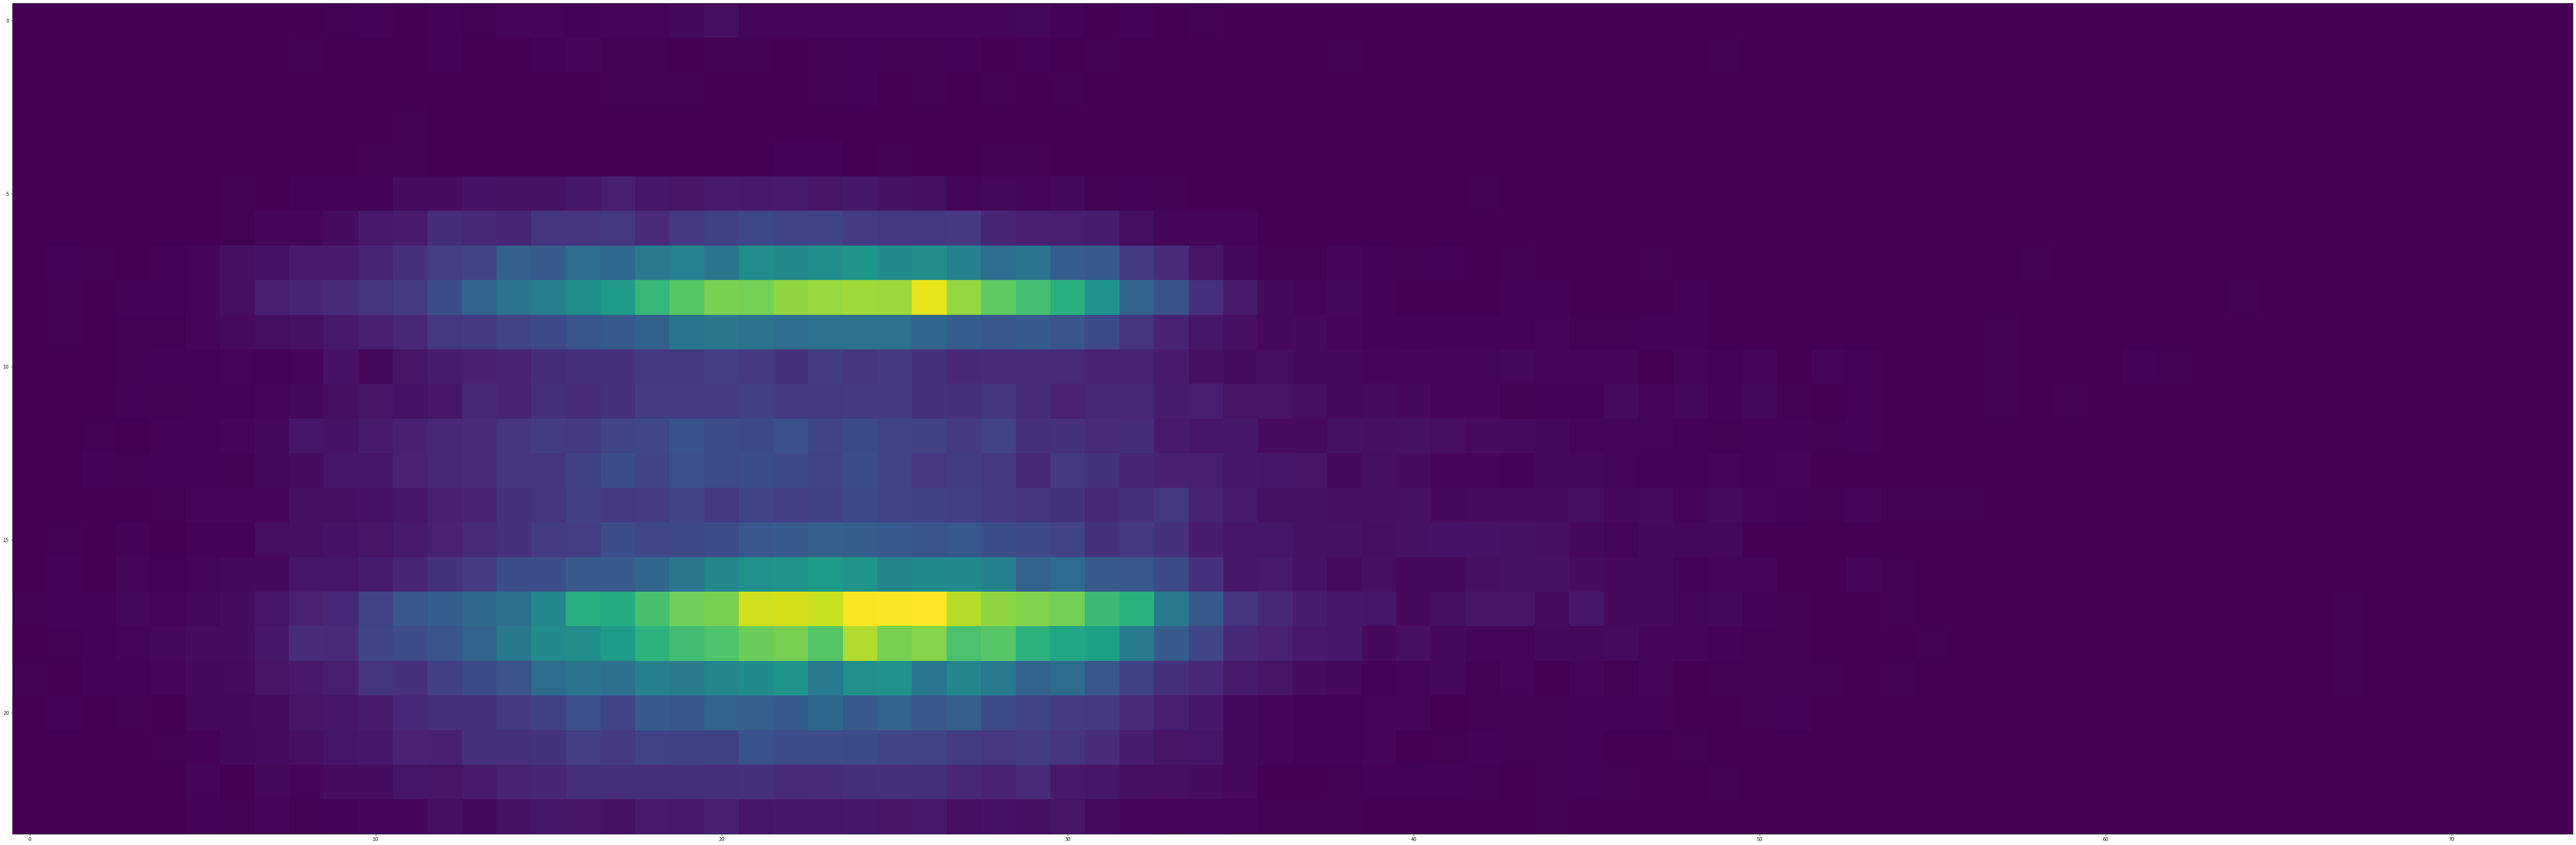

In [40]:
plt.figure(figsize=(100,100))
plt.imshow(duration_hour)

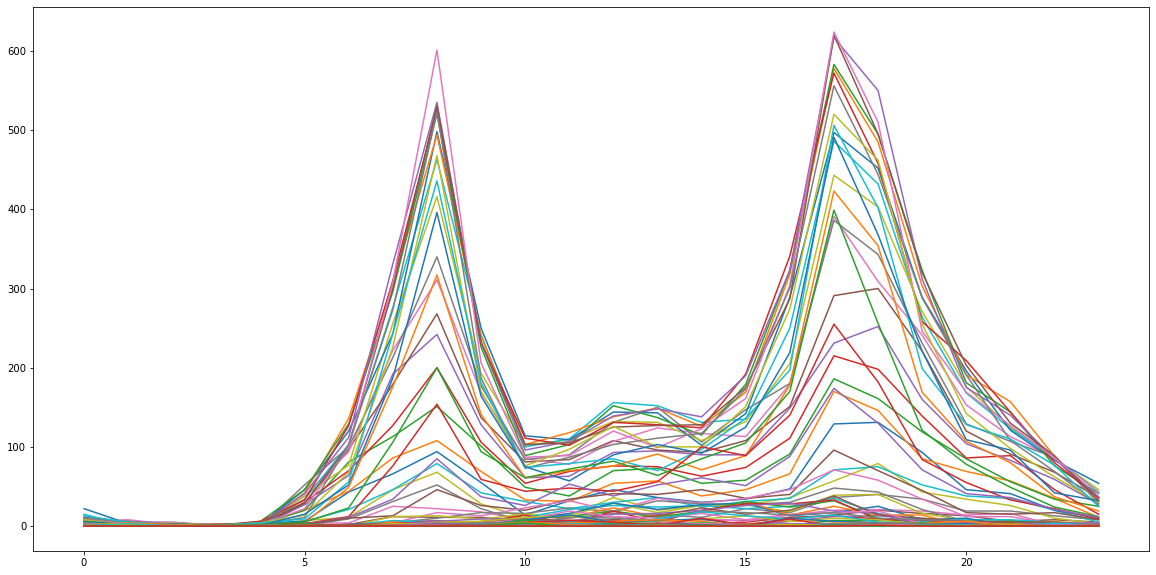

In [41]:
_=plt.plot(duration_hour)

In [42]:
bikes['Member Type'].value_counts()

Registered    467432
Casual         84967
Name: Member Type, dtype: int64

### Create a new column that represents the hour+minute of the day as a fraction (i.e. 1:30pm = 13.5)

In [43]:
np.round(.65, 1)

0.6

In [44]:
37//6, (37//6)/10, 37/60

(6, 0.6, 0.6166666666666667)

In [45]:
bikes['hour_of_day'] = (bikes.start.dt.hour + (bikes.start.dt.minute//6)/10)

In [46]:
bikes['roundhour_of_day'] = (bikes.start.dt.hour ) # keep the hour handy as well

### Aggregate to get a count per hour/minute of the day across all trips

NameError: name 'y' is not defined

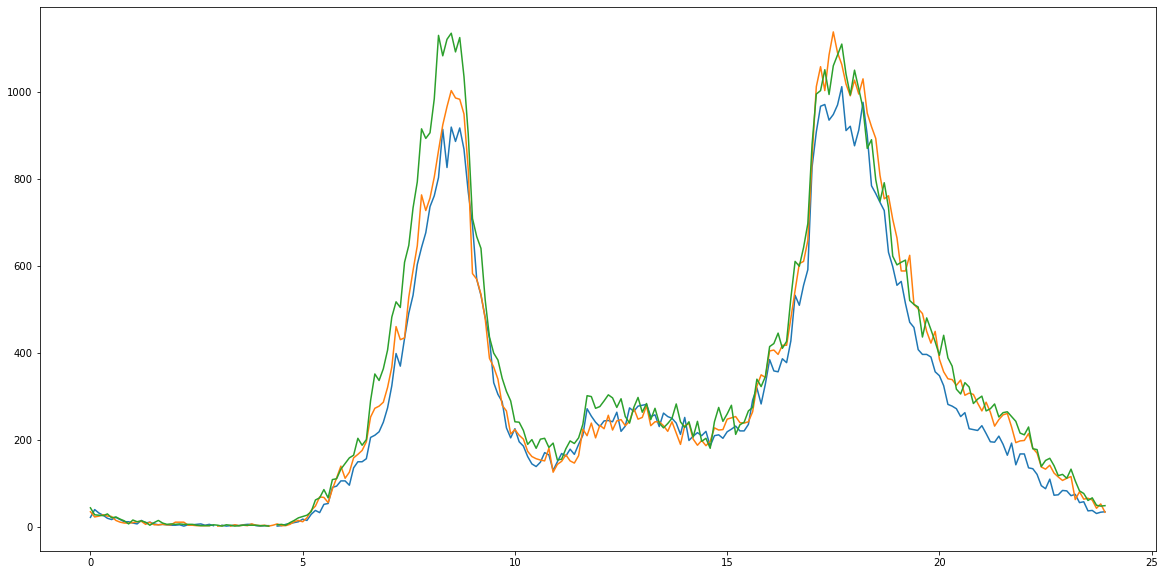

In [47]:
reg_bikes = bikes[bikes['Member Type']=='Registered']
hours = reg_bikes.groupby([reg_bikes.hour_of_day, reg_bikes.start.dt.dayofweek]).agg('count')
hours['hour'] = hours.index
day_hour_count = hours.dur.unstack()
plt.figure(figsize=(20,10))
plt.plot(day_hour_count.index, day_hour_count[0])
plt.plot(day_hour_count.index, day_hour_count[1])
plt.plot(day_hour_count.index, day_hour_count[2])
plt.plot(y.index, day_hour_count[3])
plt.plot(y.index, day_hour_count[4])
plt.plot(y.index, day_hour_count[5])
plt.plot(y.index, day_hour_count[6])

In [ ]:
day_hour_count

In [ ]:
hoursn = bikes.groupby('roundhour_of_day').agg('count')
hoursn['hour'] = hoursn.index
(hoursn.start/90).plot() # 90 days in a quarter

In [ ]:
hour_count = bikes.groupby(bikes.start.dt.dayofyear*24 + bikes.start.dt.hour).count()

In [ ]:
plt.figure(figsize=(20,10))
hour_count.start.plot()

In [ ]:
day_count = bikes.groupby(bikes.start.dt.dayofyear).count()

In [ ]:
day_hour = bikes.groupby([bikes.start.dt.dayofyear, bikes.start.dt.hour]).count()

In [ ]:
day_hour.start.unstack()

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(day_hour.start.unstack().T)

In [ ]:
day_count.start.plot()

In [ ]:
bikes.start.dt.dayofyear

In [48]:
bikes[bikes.start=="2016-01-10"].shape

(1, 15)

# Assignment 4


Explain the results in a **paragraph + charts** of  to describe which model you'd recommend. This means show the data and the model's line on the same chart. The paragraph is a simple justification and comparison of the several models you tried.

## 1. Using the **`day_hour_count`** dataframe create two dataframe `monday` and `saturday` that represent the data for those days. (hint: Monday is day=0)

In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
%matplotlib inline

In [109]:
monday = day_hour_count[[0]].copy()
monday = monday.replace(np.nan, 0)
mon = monday.to_numpy()
mon


array([[2.100e+01],
       [3.900e+01],
       [3.100e+01],
       [2.600e+01],
       [1.900e+01],
       [1.600e+01],
       [2.100e+01],
       [1.600e+01],
       [1.100e+01],
       [1.100e+01],
       [8.000e+00],
       [6.000e+00],
       [1.400e+01],
       [8.000e+00],
       [1.000e+01],
       [6.000e+00],
       [4.000e+00],
       [5.000e+00],
       [4.000e+00],
       [3.000e+00],
       [3.000e+00],
       [4.000e+00],
       [1.000e+00],
       [4.000e+00],
       [4.000e+00],
       [5.000e+00],
       [6.000e+00],
       [3.000e+00],
       [5.000e+00],
       [2.000e+00],
       [0.000e+00],
       [3.000e+00],
       [1.000e+00],
       [2.000e+00],
       [3.000e+00],
       [2.000e+00],
       [4.000e+00],
       [5.000e+00],
       [5.000e+00],
       [2.000e+00],
       [1.000e+00],
       [2.000e+00],
       [2.000e+00],
       [0.000e+00],
       [1.000e+00],
       [2.000e+00],
       [5.000e+00],
       [7.000e+00],
       [9.000e+00],
       [1.100e+01],


In [81]:
saturday = day_hour_count[[5]].copy()


## 2a. Create 3 models fit to `monday` with varying polynomial degrees. Repeat for 

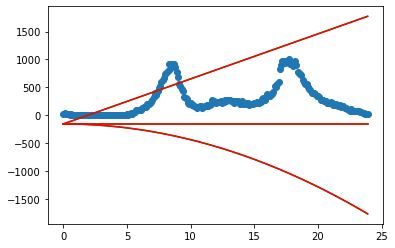

In [139]:
# Polynomial degree = 2
hour = np.array(day_hour_count.index)
x = hour.reshape(-1,1)
y = mon
poly2 = PolynomialFeatures(degree = 2)
x_2 = poly2.fit_transform(x.reshape(-1,1))

#Poly
linear = linear_model.LinearRegression()

linear.fit(x_2, y)

(linear.coef_, linear.intercept_)

#Ridge
ridge = linear_model.Ridge()
ridge.fit(x_2, y)
(ridge.coef_, ridge.intercept_)

plt.scatter(x,y)
plt.plot(x, x_2*linear.coef_ + linear.intercept_, c='g')
plt.plot(x, x_2*ridge.coef_ + ridge.intercept_, c='r')

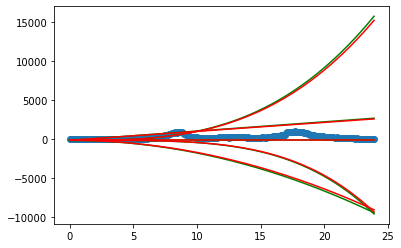

In [141]:
# Polynomial degree = 4
hour = np.array(day_hour_count.index)
x = hour.reshape(-1,1)
y = mon
poly4 = PolynomialFeatures(degree = 4)
x_4 = poly4.fit_transform(x.reshape(-1,1))

#Poly
linear = linear_model.LinearRegression()

linear.fit(x_4, y)

(linear.coef_, linear.intercept_)

#Ridge
ridge = linear_model.Ridge()
ridge.fit(x_4, y)
(ridge.coef_, ridge.intercept_)

plt.scatter(x,y)
plt.plot(x, x_4*linear.coef_ + linear.intercept_, c='g')
plt.plot(x, x_4*ridge.coef_ + ridge.intercept_, c='r')

/Users/edwardriverarivera/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.32865e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


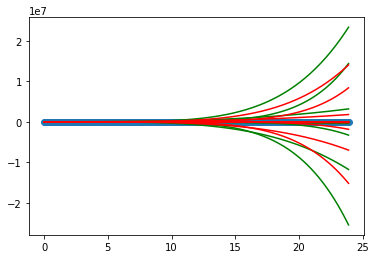

In [146]:
# Polynomial degree = 8
hour = np.array(day_hour_count.index)
x = hour.reshape(-1,1)
y = mon
poly8 = PolynomialFeatures(degree = 8)
x_8 = poly8.fit_transform(x.reshape(-1,1))

#Poly
linear = linear_model.LinearRegression()

linear.fit(x_8, y)

(linear.coef_, linear.intercept_)

#Ridge
ridge = linear_model.Ridge()
ridge.fit(x_8, y)
(ridge.coef_, ridge.intercept_)

plt.scatter(x,y)
plt.plot(x, x_8*linear.coef_ + linear.intercept_, c='g')
plt.plot(x, x_8*ridge.coef_ + ridge.intercept_, c='r')

## 2b. Repeat `2a` for `saturday`

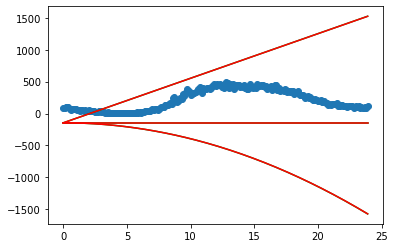

In [158]:
# Polynomial degree = 2
hour = np.array(day_hour_count.index)
x = hour.reshape(-1,1)
z = sat
poly2 = PolynomialFeatures(degree = 2)
x_2 = poly2.fit_transform(x.reshape(-1,1))

linear = linear_model.LinearRegression()

linear.fit(x_2, z)

(linear.coef_, linear.intercept_)
ridge = linear_model.Ridge(alpha=.5)


ridge.fit(x_2, z)

(ridge.coef_, ridge.intercept_)
plt.scatter(x,z)
plt.plot(x, x_2*linear.coef_ + linear.intercept_, c='g')
plt.plot(x, x_2*ridge.coef_ + ridge.intercept_, c='r')

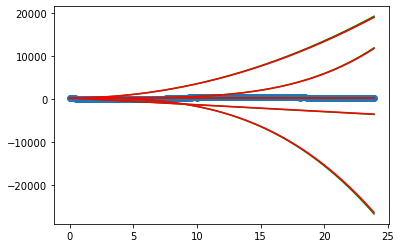

In [61]:
# Polynomial degree = 4
hour = np.array(day_hour_count.index)
x = hour.reshape(-1,1)
z = saturday
poly4 = PolynomialFeatures(degree = 4)
x_4 = poly4.fit_transform(x.reshape(-1,1))

linear = linear_model.LinearRegression()

linear.fit(x_4, z)

#(linear.coef_, linear.intercept_)
ridge = linear_model.Ridge(alpha=.5)

ridge.fit(x_4, z)

(ridge.coef_, ridge.intercept_)
plt.scatter(x,z)
plt.plot(x, x_4*linear.coef_ + linear.intercept_, c='g')
plt.plot(x, x_4*ridge.coef_ + ridge.intercept_, c='r')

/Users/edwardriverarivera/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.66432e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


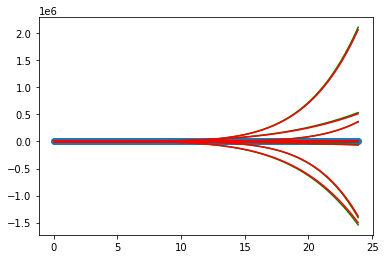

In [156]:
# Polynomial degree = 8
hour = np.array(day_hour_count.index)
x = hour.reshape(-1,1)
z = saturday
poly8 = PolynomialFeatures(degree = 8)
x_8 = poly8.fit_transform(x.reshape(-1,1))

linear = linear_model.LinearRegression()

linear.fit(x_8, z)

(linear.coef_, linear.intercept_)
ridge = linear_model.Ridge(alpha=.5)

ridge.fit(x_8, z)
(ridge.coef_, ridge.intercept_)

plt.scatter(x,z)
plt.plot(x, x_8*linear.coef_ + linear.intercept_, c='g')
plt.plot(x, x_8*ridge.coef_ + ridge.intercept_, c='r')

## 3. (for both `monday` and `saturday`) Choose one of the polynomial models and create 3 new models fit to `hour_of_day` with different Ridge Regression $\alpha$ (alpha) Ridge Coefficient values


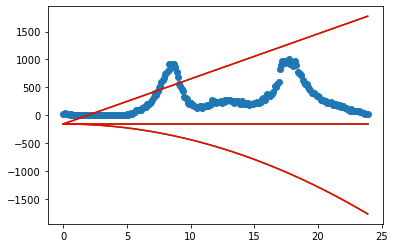

In [150]:
#Monday α = .1
hour = np.array(day_hour_count.index)
x = hour.reshape(-1,1)
y = mon
poly2 = PolynomialFeatures(degree = 2)
x_2 = poly2.fit_transform(x.reshape(-1,1))

#Poly
linear = linear_model.LinearRegression()

linear.fit(x_2, y)

(linear.coef_, linear.intercept_)

#Ridge
ridge = linear_model.Ridge(alpha=.1)
ridge.fit(x_2, y)
(ridge.coef_, ridge.intercept_)

plt.scatter(x,y)
plt.plot(x, x_2*linear.coef_ + linear.intercept_, c='g')
plt.plot(x, x_2*ridge.coef_ + ridge.intercept_, c='r')

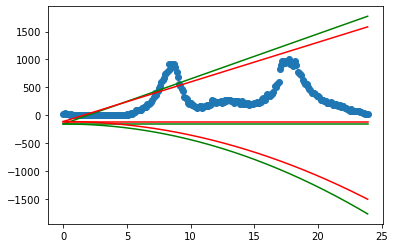

In [153]:
#Monday α = 100
hour = np.array(day_hour_count.index)
x = hour.reshape(-1,1)
y = mon
poly2 = PolynomialFeatures(degree = 2)
x_2 = poly2.fit_transform(x.reshape(-1,1))

#Poly
linear = linear_model.LinearRegression()

linear.fit(x_2, y)

(linear.coef_, linear.intercept_)

#Ridge
ridge = linear_model.Ridge(alpha=100)
ridge.fit(x_2, y)
(ridge.coef_, ridge.intercept_)

plt.scatter(x,y)
plt.plot(x, x_2*linear.coef_ + linear.intercept_, c='g')
plt.plot(x, x_2*ridge.coef_ + ridge.intercept_, c='r')

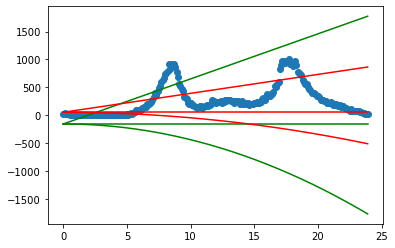

In [154]:
#Monday α = 1000
hour = np.array(day_hour_count.index)
x = hour.reshape(-1,1)
y = mon
poly2 = PolynomialFeatures(degree = 2)
x_2 = poly2.fit_transform(x.reshape(-1,1))

#Poly
linear = linear_model.LinearRegression()

linear.fit(x_2, y)

(linear.coef_, linear.intercept_)

#Ridge
ridge = linear_model.Ridge(alpha=1000)
ridge.fit(x_2, y)
(ridge.coef_, ridge.intercept_)

plt.scatter(x,y)
plt.plot(x, x_2*linear.coef_ + linear.intercept_, c='g')
plt.plot(x, x_2*ridge.coef_ + ridge.intercept_, c='r')

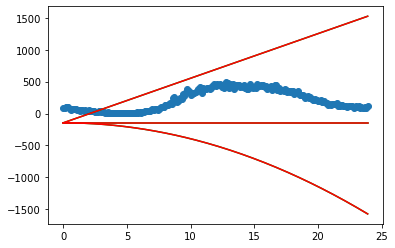

In [63]:
#Saturday α = .1
hour = np.array(day_hour_count.index)
x = hour.reshape(-1,1)
z = saturday
poly2 = PolynomialFeatures(degree = 2)
x_2 = poly2.fit_transform(x.reshape(-1,1))

linear = linear_model.LinearRegression()

linear.fit(x_2, z)

(linear.coef_, linear.intercept_)
ridge = linear_model.Ridge(alpha=.1)


ridge.fit(x_2, z)

(ridge.coef_, ridge.intercept_)
plt.scatter(x,z)
plt.plot(x, x_2*linear.coef_ + linear.intercept_, c='g')
plt.plot(x, x_2*ridge.coef_ + ridge.intercept_, c='r')

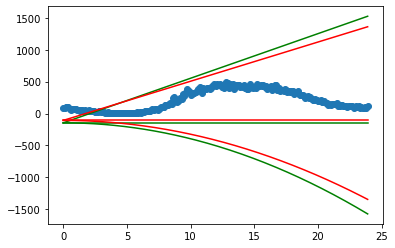

In [64]:
#Saturday α = 100
hour = np.array(day_hour_count.index)
x = hour.reshape(-1,1)
z = saturday
poly2 = PolynomialFeatures(degree = 2)
x_2 = poly2.fit_transform(x.reshape(-1,1))

linear = linear_model.LinearRegression()

linear.fit(x_2, z)

(linear.coef_, linear.intercept_)
ridge = linear_model.Ridge(alpha=100)


ridge.fit(x_2, z)

(ridge.coef_, ridge.intercept_)
plt.scatter(x,z)
plt.plot(x, x_2*linear.coef_ + linear.intercept_, c='g')
plt.plot(x, x_2*ridge.coef_ + ridge.intercept_, c='r')

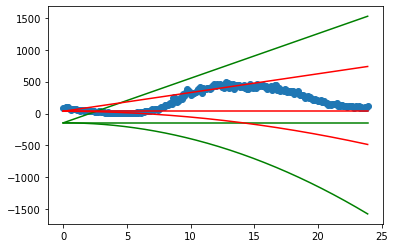

In [163]:
#Saturday α = 1000
hour = np.array(day_hour_count.index)
x = hour.reshape(-1,1)
z = saturday
poly2 = PolynomialFeatures(degree = 2)
x_2 = poly2.fit_transform(x.reshape(-1,1))

linear = linear_model.LinearRegression()

linear.fit(x_2, z)

(linear.coef_, linear.intercept_)
ridge = linear_model.Ridge(alpha=1000)


ridge.fit(x_2, z)

(ridge.coef_, ridge.intercept_)
plt.scatter(x,z)
plt.plot(x, x_2*linear.coef_ + linear.intercept_, c='g')
plt.plot(x, x_2*ridge.coef_ + ridge.intercept_, c='r')

# Paragraph
After observing six different graphs containing the combination of different degrees and alphas for the Linear "Ridge" Regression, I would say that the best model is the one with 2 polynomial degrees and the alpha closer to zero for both Monday and Saturday datasets. First, for both datasets as the polynomial degree increases, the line of fit seems to get farther from the actual curve, meaning that the predictions for the model wil not be closer to the actual results; in other words, the errors for the predictive model are increasing instead of decreasing. Following the same rationale for the polynomial degrees, augmenting the alpha for the "ridge" model will not decrease the errors of the model (it can be observed by the green lines getting further from the blue curve).

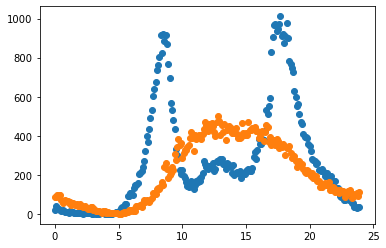

In [161]:
plt.scatter(x,y)
plt.scatter(x,z)